# Reports on Chaos Game Activities

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import random
import csv
import sympy
from sympy.ntheory.continued_fraction import continued_fraction_iterator
import skimage.io
from skimage.metrics import structural_similarity as ssim
import pickle
import seaborn as sns
import pandas as pd
from sklearn import manifold, decomposition
import multiprocessing as mp
import os
import itertools

## CGR Activity 1
Playing with the coefficients of the transformation functions will create mutate fern varieties. One example of a mutant has the following IFS

|   w   |   a   |   b   |   c    |   d   |   e    |   f   |   p   |
|-------|-------|-------|--------|-------|--------|-------|-------|
| 1     | 0.00  | 0.00  | 0.00   | 0.25  | 0.00   | -0.4  | 0.02  |
| 2     | 0.95  | 0.005 | -0.005 | 0.93  | -0.002 | 0.5   | 0.84  |
| 3     | 0.035 | -0.2  | 0.16   | 0.04  | -0.09  | 0.02  | 0.07  |
| 4     | -0.04 | 0.2   | 0.16   | 0.04  | 0.083  | 0.12  | 0.07  |

(CGRActivityReport-1a)=

a) Modify the given Barnsley fern code to create the mutant given by the IFS above. What are the differences between the original Barnsley fern and the mutant?

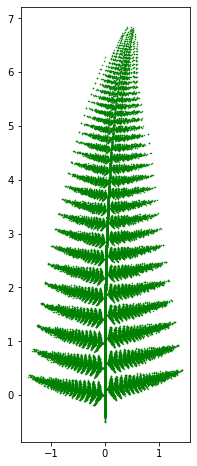

In [2]:
# Part a)
n = 50000

fern = np.zeros((2, n))

for i in range(1, n):
    r = random.random()
    if r <= 0.02:
        fern[:, i] = np.array([[0, 0], [0, 0.25]]).dot(fern[:, i-1]) + np.array([0, -0.4])
    elif r <= 0.86:
        fern[:, i] = np.array([[0.95, 0.005], [-0.005, 0.93]]).dot(fern[:, i-1]) + np.array([-0.002, 0.5])
    elif r <= 0.93:
        fern[:, i] = np.array([[0.035, -0.2], [0.16, 0.04]]).dot(fern[:, i-1]) + np.array([-0.09, 0.02])
    else:
        fern[:, i] = np.array([[-0.04, 0.2], [0.16, 0.04]]).dot(fern[:, i-1]) + np.array([0.083, 0.12])

fig = plt.figure(figsize=(8, 8))
plt.plot(fern[0, :], fern[1, :], 'g.', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

{ref}`[Go back to Activity] <CGRActivity-1>`

(CGRActivityReport-1b)=

b) Create your own Barnsley fern mutate by changing the coefficients.

For Part b, we will use the following IFS:

|   w   |   a   |   b   |   c    |   d   |   e    |   f   |   p   |
|-------|-------|-------|--------|-------|--------|-------|-------|
| 1     | 0.00  | 0.00  | 0.00   | 0.25  | 0.00   | -0.14 | 0.02  |
| 2     | 0.85  | 0.02  | -0.02  | 0.83  | 0.00   | 1     | 0.84  |
| 3     | 0.09  | -0.28 | 0.3    | 0.11  | 0.00   | 0.6   | 0.07  |
| 4     | -0.09 | 0.28  | 0.3    | 0.09  | 0.00   | 0.7   | 0.07  |

which gives the following results

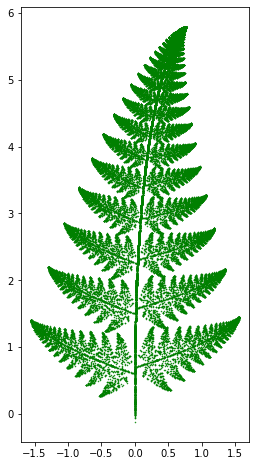

In [3]:
# Part b)
n = 50000

fern = np.zeros((2, n))

for i in range(1, n):
    r = random.random()
    if r <= 0.02:
        fern[:, i] = np.array([[0, 0], [0, 0.25]]).dot(fern[:, i-1]) + np.array([0, -0.14])
    elif r <= 0.86:
        fern[:, i] = np.array([[0.85, 0.02], [-0.02, 0.83]]).dot(fern[:, i-1]) + np.array([0, 1])
    elif r <= 0.93:
        fern[:, i] = np.array([[0.09, -0.28], [0.3, 0.1]]).dot(fern[:, i-1]) + np.array([0, 0.6])
    else:
        fern[:, i] = np.array([[-0.09, 0.28], [0.3, 0.09]]).dot(fern[:, i-1]) + np.array([0, 0.7])

fig = plt.figure(figsize=(8, 8))
plt.plot(fern[0, :], fern[1, :], 'g.', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

{ref}`[Go back to Activity] <CGRActivity-1>`

(CGRActivityReport-2)=

## CGR Activity 2

[Paul Bourke's website](http://paulbourke.net/fractals/ifs/) provides several images produced by IFS. Replicate some of these examples using Python.

In [4]:
# Create general function to perform IFS

def IFS(param, n):

#   Inputs:
#       param: np.array, where the number of rows is the number of functions used in the IFS, and the columns correspond to a, b, c, d, e, f, p
#       n: number of iterations
#   Output:
#       coord: the coordinates of the IFS

    coord = np.zeros((2, n))
    
    prob_list = np.cumsum(param[:, -1])
    
    for i in range(1, n):
        r = random.random()
        for j in range(len(prob_list)):
            if r < prob_list[j]:
                ind = j
                break
        coord[:, i] = param[ind, :4].reshape((2, 2)).dot(coord[:, i-1]) + param[ind, 4:6]
        
    return(coord)

_IFS Spiral Parameter table:_

|   w   |     a     |     b     |     c     |     d     |     e     |     f     |   p   |
|-------|-----------|-----------|-----------|-----------|-----------|-----------|-------|
| 1     | 0.787879  | -0.424242 | 0.242424  | 0.859848  | 1.758647  | 1.408065  | 0.90  |
| 2     | -0.121212 | 0.257576  | 0.151515  | 0.053030  | -6.721654 | 1.377236  | 0.05  |
| 3     | 0.181818  | -0.136364 | 0.090909  | 0.181818  | 6.086107  | 1.568035  | 0.05  |

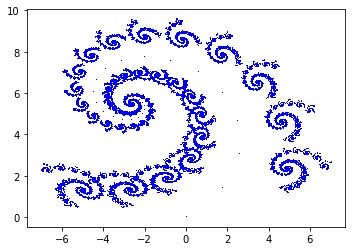

In [5]:
spiral_param = np.array([[0.787879, -0.424242, 0.242424, 0.859848, 1.758647, 1.408065, 0.90],
                         [-0.121212, 0.257576, 0.151515, 0.053030, -6.721654, 1.377236, 0.05],
                         [0.181818, -0.136364, 0.090909, 0.181818, 6.086107, 1.568035, 0.05]])
spiral = IFS(spiral_param, 50000)
plt.plot(spiral[0, :], spiral[1, :], 'b,')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

_Maple Leaf Parameter Table:_

|   w   |   a   |   b   |   c    |   d   |   e    |   f   |   p   |
|-------|-------|-------|--------|-------|--------|-------|-------|
| 1     | 0.14  | 0.01  | 0.00   | 0.51  | -0.08  | -1.31 | 0.25  |
| 2     | 0.43  | 0.52  | -0.45  | 0.50  | 1.49   | -0.75 | 0.25  |
| 3     | 0.45  | -0.49 | 0.47   | 0.47  | -1.62  | -0.74 | 0.25  |
| 4     | 0.49  | 0.00  | 0.00   | 0.51  | 0.02   | 1.62  | 0.25  |

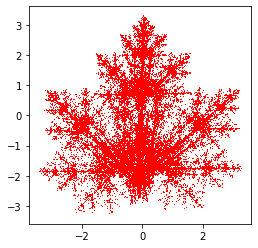

In [6]:
leaf_param = np.array([[0.14, 0.01, 0.00, 0.51, -0.08, -1.31, 0.25],
                 [0.43, 0.52, -0.45, 0.50, 1.49, -0.75, 0.25],
                 [0.45, -0.49, 0.47, 0.47, -1.62, -0.74, 0.25],
                 [0.49, 0.00, 0.00, 0.51, 0.02, 1.62, 0.25]])
leaf = IFS(leaf_param, 50000)
plt.plot(leaf[0, :], leaf[1, :], 'r,')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

_Tree Parameter Table:_

|   w   |   a   |   b   |   c    |   d   |   e    |   f   |   p   |
|-------|-------|-------|--------|-------|--------|-------|-------|
| 1     | 0.05  | 0.00  | 0.00   | 0.40  | -0.06  | -0.47 | 0.143 |
| 2     | -0.05 | 0.00  | 0.00   | -0.40 | -0.06  | -0.47 | 0.143 |
| 3     | 0.03  | -0.14 | 0.00   | 0.26  | -0.16  | -0.01 | 0.143 |
| 4     | -0.03 | 0.14  | 0.00   | -0.26 | -0.16  | -0.01 | 0.143 |
| 5     | 0.56  | 0.44  | -0.37  | 0.51  | 0.30   | 0.15  | 0.143 |
| 6     | 0.19  | 0.07  | -0.10  | 0.15  | -0.02  | 0.28  | 0.143 |
| 7     | -0.33 | -0.34 | -0.33  | 0.34  | -0.54  | 0.39  | 0.143 |

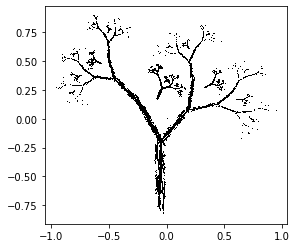

In [7]:
tree_param = np.array([[0.05, 0.00, 0.00, 0.40, -0.06, -0.47, 0.143],
                       [-0.05, 0.00, 0.00, -0.40, -0.06, -0.47, 0.143],
                       [0.03, -0.14, 0.00, 0.26, -0.16, -0.01, 0.143],
                       [-0.03, 0.14, 0.00, -0.26, -0.16, -0.01, 0.143],
                       [0.56, 0.44, -0.37, 0.51, 0.30, 0.15, 0.143],
                       [0.19, 0.07, -0.10, 0.15, -0.02, 0.28, 0.143],
                       [-0.33, -0.34, -0.33, 0.34, -0.54, 0.39, 0.143]])
tree = IFS(tree_param, 50000)
plt.plot(tree[0, :], tree[1, :], 'k,')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

{ref}`[Go back to Activity] <CGRActivity-2>`

(CGRActivityReport-3)=

## CGR Activity 3
Using the provided code (or if you're brave, write your own), create a generalized CGR of a 6, 9, and 12-sided polygon (using the dividing rate formula by Almeida).

In [8]:
def n_gon(n, *start):
    if start:
        deg = np.linspace(start[0], start[0] + 360, n+1)
    else:
        deg = np.linspace(0, 360, n+1)
    deg = deg[:-1]
    rad = []
    for d in deg:
        rad.append((d/360)*2*math.pi)
    cor = np.zeros((2, n+1))
    for r in range(len(rad)):
        x = math.cos(rad[r])
        y = math.sin(rad[r])
        cor[:, r] = np.array([x, y])
    cor[:, n] = cor[:, 0]
    return cor

def dividingRateAlmeida(n):
    k = round((n+2.)/4.)
    s_num = 2*math.cos(math.pi*((1/2) - (k/n))) - 2*math.cos(math.pi*((1/2)-(1/(2*n))))*math.cos((2*k-1)*(math.pi/(2*n)))*(1 + (math.tan((2*k-1)*(math.pi/(2*n))))/(math.tan(math.pi-((n+2*k-2)*(math.pi/(2*n))))))
    s_den = 2*math.cos(math.pi*((1/2) - (k/n)))
    return s_num/s_den

def generalizedCGR(N, divide_func, n, *start):
    if start:
        shape_coord = n_gon(n, start[0])
    else:
        shape_coord = n_gon(n)
    r = divide_func(n)
    dataPoints = np.zeros((2, N))
    for i in range(1, N):
        rand = random.random()
        dataPoints[:, i] = dataPoints[:, i-1] + (shape_coord[:, math.floor(n*rand)] - dataPoints[:, i-1])*r
    return(r, shape_coord, dataPoints)

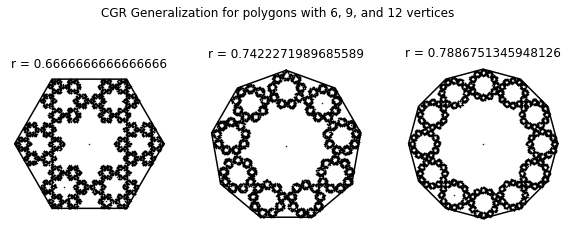

In [9]:
N = 10000
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle('CGR Generalization for polygons with 6, 9, and 12 vertices')

(r, coord, points) = generalizedCGR(N, dividingRateAlmeida, 6, 0)
ax1.plot(coord[0, :], coord[1, :], 'k')
ax1.plot(points[0, :], points[1, :], 'k.', markersize=1)
ax1.axis('off')
ax1.set_aspect('equal', 'box')
ax1.set_title('r = {}'.format(r))

(r, coord, points) = generalizedCGR(N, dividingRateAlmeida, 9, 90)
ax2.plot(coord[0, :], coord[1, :], 'k')
ax2.plot(points[0, :], points[1, :], 'k.', markersize=1)
ax2.axis('off')
ax2.set_aspect('equal', 'box')
ax2.set_title('r = {}'.format(r))

(r, coord, points) = generalizedCGR(N, dividingRateAlmeida, 12, 0)
ax3.plot(coord[0, :], coord[1, :], 'k')
ax3.plot(points[0, :], points[1, :], 'k.', markersize=1)
ax3.axis('off')
ax3.set_aspect('equal', 'box')
ax3.set_title('r = {}'.format(r))

plt.show()

{ref}`[Go back to Activity] <CGRActivity-3>`

(CGRActivityReport-4)=
## CGR Activity 4
Produce your own CGR of DNA sequences of your chosing. Pick sequences that are from difference species, such as plants, fungi, protists, etc. It is recommended that the length of the sequence does not exceed 50000 bp. Compare the CGRs of the difference species visually? Are there any species in which their CGRs are similar to one another? How about species in which their CGRs are most different from each other?

In [10]:
def parse_sequence(filename):
    with open(filename) as inputfile:
        next(inputfile)
        results = list(csv.reader(inputfile))
    seq = ''
    for r in results[:-1]:
        seq = seq + r[0]
    return seq

def dna_cgr(seq):
    N = len(seq)
    dataPoints = np.zeros((2, N+1))
    dataPoints[:, 0] = np.array([0.5, 0.5])
    for i in range(1, N+1):
        if seq[i-1] == 'A':
            corner = np.array([0, 0])
        elif seq[i-1] == 'C':
            corner = np.array([0, 1])
        elif seq[i-1] == 'G':
            corner = np.array([1, 1])
        else:
            corner = np.array([1, 0])
        dataPoints[:, i] = 0.5*(dataPoints[:, i-1] + corner)
    return(dataPoints)

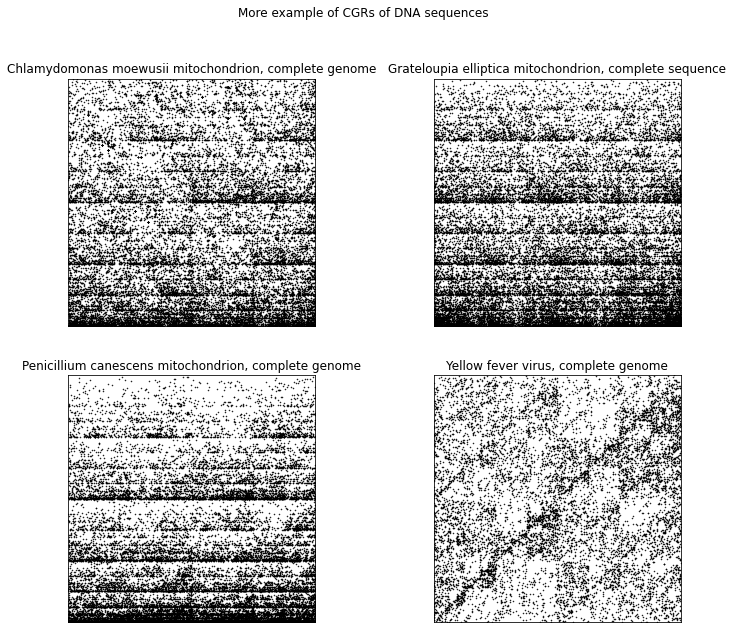

In [11]:
plant_dna = parse_sequence('../Supplementary Material/CGR/Activities/Example Fasta Files/Chlamydomonas moewusii mitochondrion.fasta')
plant_coord = dna_cgr(plant_dna)

protist_dna = parse_sequence('../Supplementary Material/CGR/Activities/Example Fasta Files/Grateloupia elliptica mitochondrion.fasta')
protist_coord = dna_cgr(protist_dna)

fungi_dna = parse_sequence('../Supplementary Material/CGR/Activities/Example Fasta Files/Penicillium canescens mitochondrion.fasta')
fungi_coord = dna_cgr(fungi_dna)

virus_dna = parse_sequence('../Supplementary Material/CGR/Activities/Example Fasta Files/Yellow fever virus.fasta')
virus_coord = dna_cgr(virus_dna)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('More example of CGRs of DNA sequences')

ax1.plot(plant_coord[0, :], plant_coord[1, :], 'k.', markersize=1)
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_aspect('equal', 'box')
ax1.set_title('Chlamydomonas moewusii mitochondrion, complete genome')

ax2.plot(protist_coord[0, :], protist_coord[1, :], 'k.', markersize=1)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_aspect('equal', 'box')
ax2.set_title('Grateloupia elliptica mitochondrion, complete sequence')

ax3.plot(fungi_coord[0, :], fungi_coord[1, :], 'k.', markersize=1)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
ax3.set_aspect('equal', 'box')
ax3.set_title('Penicillium canescens mitochondrion, complete genome')

ax4.plot(virus_coord[0, :], virus_coord[1, :], 'k.', markersize=1)
ax4.axes.xaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)
ax4.set_xlim([0, 1])
ax4.set_ylim([0, 1])
ax4.set_aspect('equal', 'box')
ax4.set_title('Yellow fever virus, complete genome')

plt.show()

{ref}`[Go back to Activity] <CGRActivity-4>`

(CGRActivityReport-5)=

## CGR Activity 5
Create a molecular distance map of the mitochondrion DNA of molluscs. The Fasta files are provided to you and can be found in the `Supplementary Material/CGR/Activities/Molluscs/Fasta Files` folder.

In [12]:
# Function taken from https://pyseer.readthedocs.io/en/master/_modules/pyseer/cmdscale.html
def cmdscale(D):
    """Classical multidimensional scaling (MDS)

    Args:
        D (numpy.array)
            Symmetric distance matrix (n, n)

    Returns:
        Y (numpy.array)
            Configuration matrix (n, p). Each column represents a dimension. Only the
            p dimensions corresponding to positive eigenvalues of B are returned.
            Note that each dimension is only determined up to an overall sign,
            corresponding to a reflection.
        e (numpy.array)
            Eigenvalues of B (n, 1)
    """
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n))/n

    # YY^T
    B = -H.dot(D**2).dot(H)/2

    # Diagonalize
    evals, evecs = np.linalg.eigh(B)

    # Sort by eigenvalue in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]

    # Compute the coordinates using positive-eigenvalued components only
    w, = np.where(evals > 0)
    L = np.diag(np.sqrt(evals[w]))
    V = evecs[:, w]
    Y = V.dot(L)

    return Y, evals[evals > 0]

In [13]:
# Since the code to produce the molecular distance map is very similar to the code 
# provided for the vertebrate animals molecular distance map, we will only show the final results here
file = open("../Supplementary Material/CGR/Activities/Molluscs/molluscs_class.pkl", "rb")
molluscsCGR = pickle.load(file)
file.close()

molluscs_class = []
for item in molluscsCGR.items():
    molluscs_class.append(item[1])

DSSIM_molluscs = np.load('../Supplementary Material/CGR/Activities/Molluscs/DSSIM_molluscs.dat', allow_pickle=True)
coord, _ = cmdscale(DSSIM_molluscs)
coord_splice = coord[:, :3]
molluscs_df = pd.DataFrame(data = coord_splice, columns = ['x', 'y', 'z'])
molluscs_df['class'] = molluscs_class
molluscs_df.head()

,x,y,z,class
0,-0.015832,0.138594,-0.048093,Bivalves
1,0.166413,-0.044601,-0.260547,Bivalves
2,-0.008613,0.130274,-0.042172,Bivalves
3,-0.025825,0.192554,-0.065132,Bivalves
4,-0.004111,0.133098,-0.054696,Bivalves


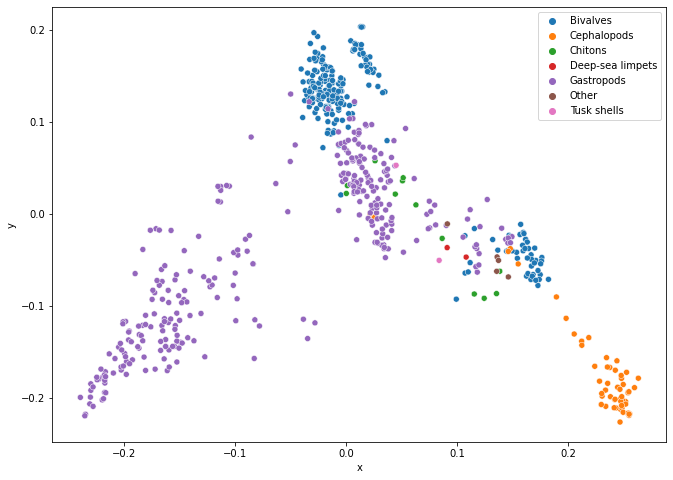

In [14]:
# 2D Molecular Distance Map
fig = plt.figure(figsize=(11, 8))
ax = sns.scatterplot(x='x', y='y', hue='class', data=molluscs_df)
legend = ax.legend()
plt.show()

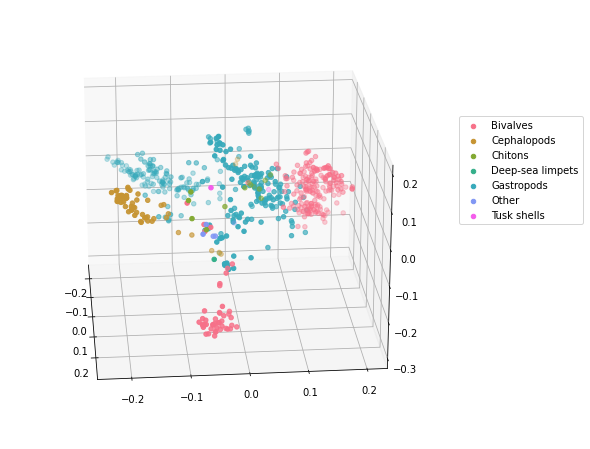

In [15]:
# 3D Molecular Distance Map
molluscs_class_unique = molluscs_df['class'].unique()
cmap = sns.color_palette("husl", len(molluscs_class_unique))
fig = plt.figure(figsize=(11, 8))
ax = plt.axes(projection = '3d')
fig.add_axes(ax)
for i in range(len(molluscs_class_unique)):
    data = molluscs_df.loc[molluscs_df['class'] == molluscs_class_unique[i]]
    ax.scatter(data['x'], data['y'], data['z'], label=molluscs_class_unique[i], color=cmap[i])
ax.view_init(22, -5)
plt.legend(loc=(1.04,0.5))
plt.show()

{ref}`[Go back to Activity] <CGRActivity-5>`

(CGRActivityReport-6)=

## CGR Activity 6
Create a molecular distance map of the cytochrome b (mitochondrion) protein in all land plants. Fasta files are located in the `Supplementary Material/CGR/Activities/Land Plants/Fasta Files` folder.

In [16]:
# For script to calculate the dissimilarity matrix, see main.py located in "Supplementary Material/CGr/Activities/Land Plants"
file = open("../Supplementary Material/CGR/Activities/Land Plants/plant_class.pkl", "rb")
plant_class = pickle.load(file)
file.close()

DSSIM_plants = np.load('../Supplementary Material/CGR/Activities/Land Plants/DSSIM_plants.dat', allow_pickle=True)
coord, _ = cmdscale(DSSIM_plants)
coord_splice = coord[:, :3]
plants_df = pd.DataFrame(data = coord_splice, columns = ['x', 'y', 'z'])
plants_df['class'] = plant_class
plants_df.head()

,x,y,z,class
0,0.022462,-0.032590,0.022118,hornworts
1,0.018454,-0.030993,-0.011276,hornworts
2,0.021809,-0.042688,-0.003837,hornworts
3,0.021809,-0.042688,-0.003837,hornworts
4,0.013436,0.001523,0.005948,liverworts


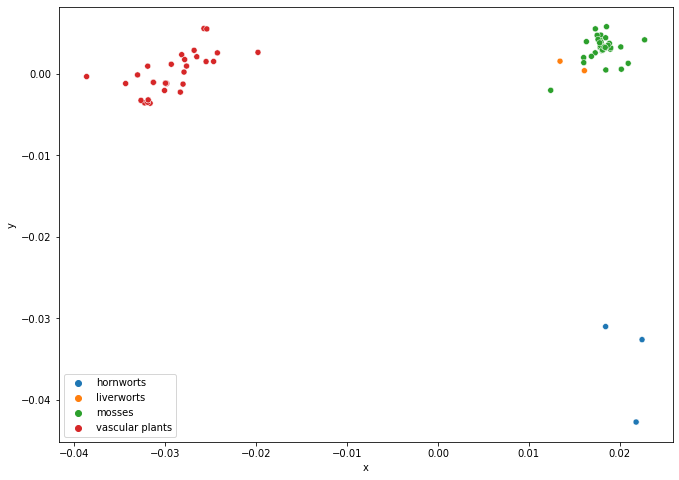

In [17]:
# 2D Molecular Distance Map
fig = plt.figure(figsize=(11, 8))
ax = sns.scatterplot(x='x', y='y', hue='class', data=plants_df)
legend = ax.legend()
plt.show()

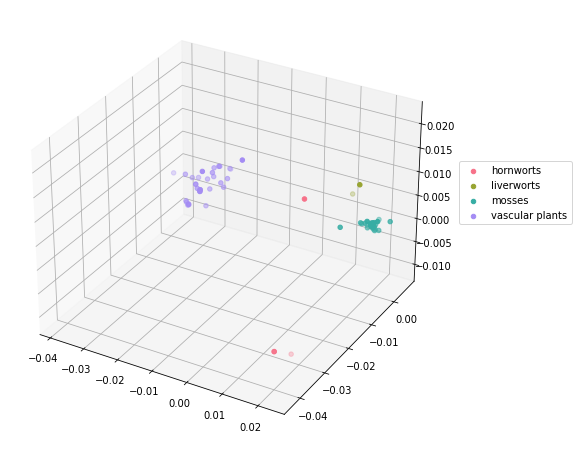

In [18]:
# 3D Molecular Distance Map
plants_class_unique = plants_df['class'].unique()
cmap = sns.color_palette("husl", len(plants_class_unique))
fig = plt.figure(figsize=(11, 8))
ax = plt.axes(projection = '3d')
fig.add_axes(ax)
for i in range(len(plants_class_unique)):
    data = plants_df.loc[plants_df['class'] == plants_class_unique[i]]
    ax.scatter(data['x'], data['y'], data['z'], label=plants_class_unique[i], color=cmap[i])
plt.legend(loc=(1.04,0.5))
plt.show()

{ref}`[Go back to Activity] <CGRActivity-6>`

## CGR Activity 7
Create a square CGR for the digits of $\pi$ by reading 2 digits at a time (as explained above). Assign the two-digit numbers a corner by the following two methods:

In [19]:
def pi_digits(n):
    S = str(sympy.N(sympy.pi, n+1))
    return(list(map(int, list(S[2:]))))

In [20]:
N = 10000

pi_seq = pi_digits(N)

(CGRActivityReport-7a)=

a) taking the modulo (base 4) and assigning the corners 0, 1, 2, 3

In [21]:
# Function for part a of the activity
def CGR_pair_mod4(seq):
    if len(seq)%2 == 1:
        seq = seq[:-1]
    N = int(len(seq)/2)
    dataPoints = np.zeros((2, N+1))
    dataPoints[:, 0] = np.array([0.5, 0.5])
    for i in range(1, N+1):
        value = int(str(seq[2*(i-1)]) + str(seq[2*(i-1)+1]))
        if value%4 == 0:
            corner = np.array([0, 0])
        elif value%4 == 1:
            corner = np.array([0, 1])
        elif value%4 == 2:
            corner = np.array([1, 1])
        else:
            corner = np.array([1, 0])
        dataPoints[:, i] = 0.5*(dataPoints[:, i-1] + corner)
    return(dataPoints)

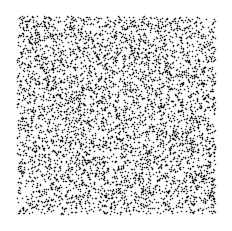

In [22]:
# CGR of the digits of pi (paired up) - corners are determined by mod 4 of the number
coord = CGR_pair_mod4(pi_seq)
plt.plot(coord[0, :], coord[1, :], 'k.', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

{ref}`[Go back to Activity] <CGRActivity-7>`

(CGRActivityReport-7b)=

b) assigning the corners to cover the values 0-24, 25-49, 50-74, and 75-99, respectively.

In [23]:
# Function for part b of the activity
def CGR_pair_group(seq):
    if len(seq)%2 == 1:
        seq = seq[:-1]
    N = int(len(seq)/2)
    dataPoints = np.zeros((2, N+1))
    dataPoints[:, 0] = np.array([0.5, 0.5])
    for i in range(1, N+1):
        value = int(str(seq[2*(i-1)]) + str(seq[2*(i-1)+1]))
        if value < 25:
            corner = np.array([0, 0])
        elif value < 50:
            corner = np.array([0, 1])
        elif value < 75:
            corner = np.array([1, 1])
        else:
            corner = np.array([1, 0])
        dataPoints[:, i] = 0.5*(dataPoints[:, i-1] + corner)
    return(dataPoints)

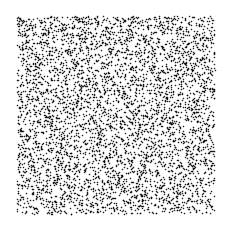

In [24]:
# CGR of the digits of pi (paired up) - corners are determined by the value of the pair
coord = CGR_pair_group(pi_seq)
plt.plot(coord[0, :], coord[1, :], 'k.', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

{ref}`[Go back to Activity] <CGRActivity-7>`

(CGRActivityReport-7c)=

c) Do the CGRs look different from one another? What conclusions can you draw from the two CGRs?

There are no obvious differences between the two methods of grouping the numbers. This suggests that the digits of $\pi$ are random.

{ref}`[Go back to Activity] <CGRActivity-7>`

(CGRActivityReport-8)=

## CGR Activity 8
Repeat the above exercise with the digits of $e = 2.71828...$

In [25]:
def e_digits(n):
    S = str(sympy.N(sympy.exp(1), n+1))
    return(list(map(int, list(S[2:]))))

In [26]:
e_seq = e_digits(N)

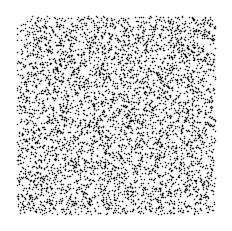

In [27]:
# CGR of the digits of e (paired up) - corners are determined by mod 4 of the number
coord = CGR_pair_mod4(e_seq)
plt.plot(coord[0, :], coord[1, :], 'k.', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

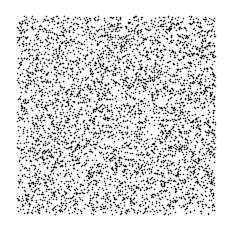

In [28]:
# CGR of the digits of e (paired up) - corners are determined by the value of the pair
coord = CGR_pair_group(e_seq)
plt.plot(coord[0, :], coord[1, :], 'k.', markersize=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

{ref}`[Go back to Activity] <CGRActivity-8>`

(CGRActivityReport-9)=

## CGR Activity 9
Create another CGR using the partial quotients of a continued fraction of any irrational number of your choosing. Feel free to use CGRs with different number of vertices or grouping the numbers in different ways (such as what we did for the digits of $\pi$ in a previous activity).

In [29]:
def confrac(expr, n):
    result = []
    for i, v in enumerate(continued_fraction_iterator(expr)):
        if i > (n-1):
            break
        result.append(v)
    return(result)

def numeric_cgr(seq, n_ver, *start):
    N = len(seq)
    if start:
        vertices = n_gon(n_ver, start[0])
    else:
        vertices = n_gon(n_ver, 0)
    r = dividingRateAlmeida(n_ver)
    dataPoints = np.zeros((2, N+1))
    for i in range(1, N+1):
        index = seq[i-1]%n_ver
        dataPoints[:, i] = dataPoints[:, i-1] + (vertices[:, index] - dataPoints[:, i-1])*r
    return(vertices, dataPoints)

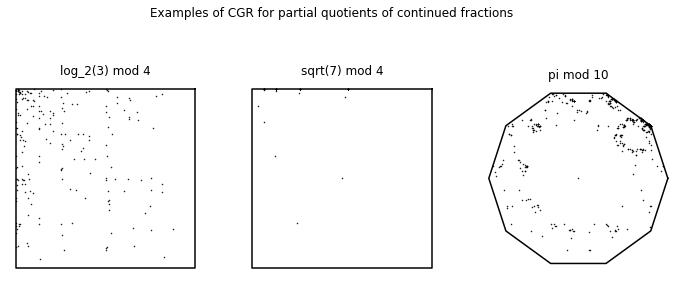

In [30]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Examples of CGR for partial quotients of continued fractions')

pq_log3base2 = confrac(sympy.log(3, 2), 200)
(coord, points) = numeric_cgr(pq_log3base2, 4, 45)
ax1.plot(coord[0, :], coord[1, :], 'k')
ax1.plot(points[0, :], points[1, :], 'k.', markersize=1)
ax1.axis('off')
ax1.set_aspect('equal', 'box')
ax1.set_title('log_2(3) mod 4')

pq_sqrt7 = confrac(sympy.sqrt(7), 200)
(coord, points) = numeric_cgr(pq_sqrt7, 4, 45)
ax2.plot(coord[0, :], coord[1, :], 'k')
ax2.plot(points[0, :], points[1, :], 'k.', markersize=1)
ax2.axis('off')
ax2.set_aspect('equal', 'box')
ax2.set_title('sqrt(7) mod 4')

pq_pi = confrac(sympy.pi, 450)
(coord, points) = numeric_cgr(pq_pi, 10, 0)
ax3.plot(coord[0, :], coord[1, :], 'k')
ax3.plot(points[0, :], points[1, :], 'k.', markersize=1)
ax3.axis('off')
ax3.set_aspect('equal', 'box')
ax3.set_title('pi mod 10')

plt.show()

{ref}`[Go back to Activity] <CGRActivity-9>`